# REPLOT 15 GRAPHS IN A WAY THAT SHOWS THE RELATIONSHIPS BETWEEN THE DATA.

In [58]:
# Import the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FixedLocator
from scipy import stats
from scipy.stats import pearsonr

In [51]:
df = pd.read_csv(r"C:\Users\user\PYTHON_JOHN\retails.csv")
df.head(10)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,selling_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0
5,6,2022-03-13,NaN,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,7,1.5,48.5,-1.5
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,4,0.3,9.7,-0.3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,6,45.5,864.5,4.5
8,9,2023-03-23,NaN,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,3,0.4,19.6,-0.4
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,5,3.3,106.7,16.7


### SCATTER PLOT

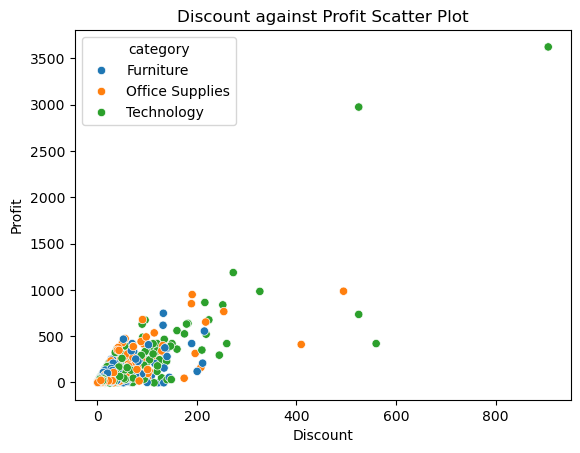

In [9]:
# A scatter plot will help highlight the relationship between two numeric variables
# Scatter plot with discount against profit
sns.scatterplot(data=df, x="discount", y="profit", hue="category")

# Adding Title to the Plot
plt.title("Discount against Profit Scatter Plot")

# Setting the X and Y labels
plt.xlabel('Discount')
plt.ylabel('Profit')

plt.show()

### LINE PLOT

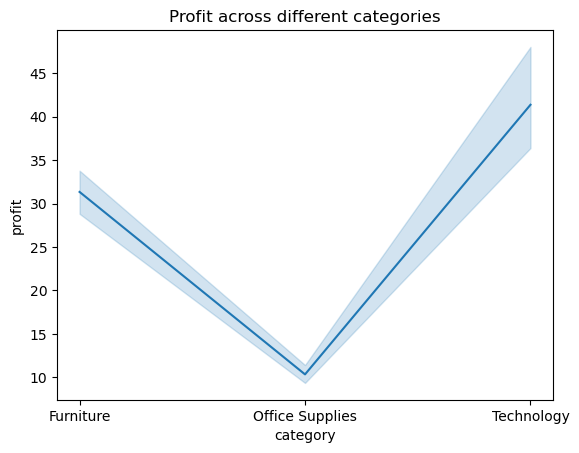

In [17]:
# A line plot shows trends over time
sns.lineplot(x='category', y='profit', data=df)
# Adding Title to the Plot
plt.title("Profit across different categories")
plt.show()



### BAR PLOT

C:\Users\user\AppData\Local\Temp\ipykernel_14200\3287272101.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ship_mode', data=df, palette='pastel')


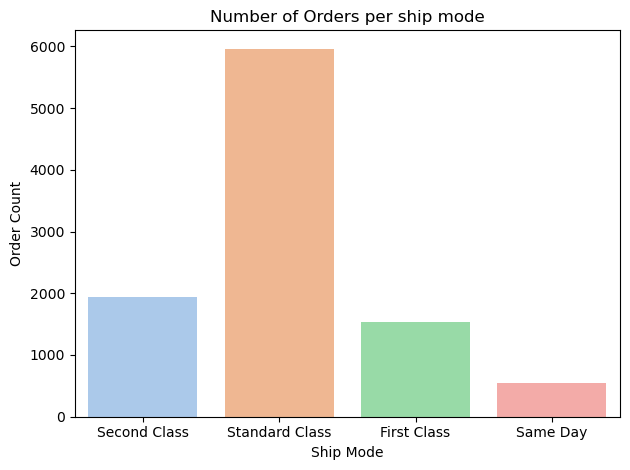

In [18]:
# A bar plot
# Shows the comparison of categories by use of a numeric metric
# Number of orders per ship mode
sns.countplot(x='ship_mode', data=df, palette='pastel')
plt.title("Number of Orders per ship mode")
plt.xlabel("Ship Mode")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()

### GROUPED BAR CHART

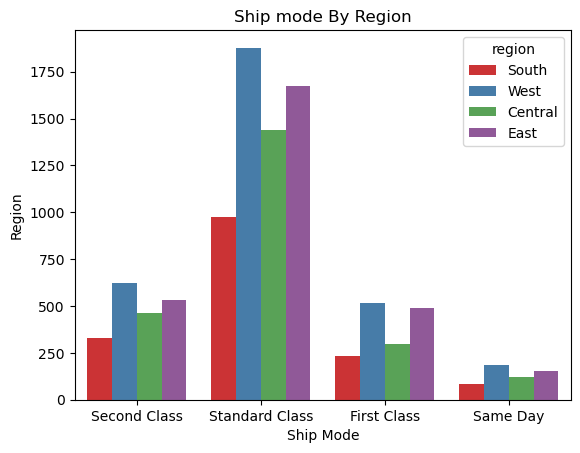

In [20]:
# This chart highlights subcategory comparisons across categories
sns.countplot(x='ship_mode', hue='region', data=df, palette='Set1')
plt.title("Ship mode By Region")
plt.xlabel("Ship Mode")
plt.ylabel("Region")
plt.show()

### BOX PLOT

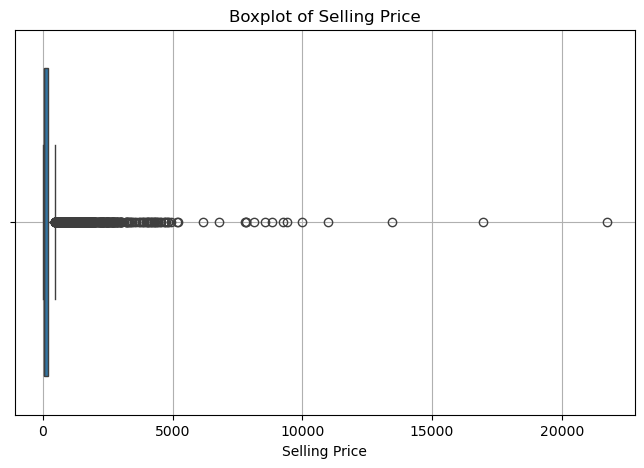

In [21]:
# Distribution, spread, and outliers across categories are easily shown using a box plot
plt.figure(figsize=(8,5))
sns.boxplot(x=df['selling_price'])  
plt.title('Boxplot of Selling Price')
plt.xlabel('Selling Price')
plt.grid(True)
plt.show()


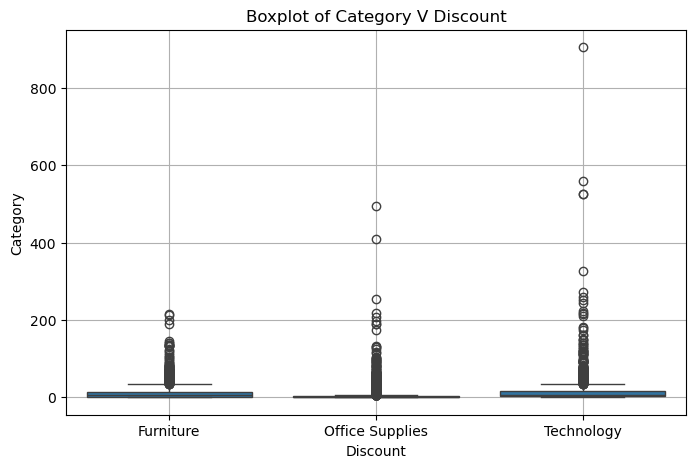

In [22]:

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="category", y="discount")
plt.title('Boxplot of Category V Discount')
plt.xlabel('Discount')
plt.ylabel('Category')
plt.grid(True)
plt.show()



### VIOLIN PLOT

C:\Users\user\AppData\Local\Temp\ipykernel_14200\1327170083.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='segment', y='discount', data=df, palette='muted')


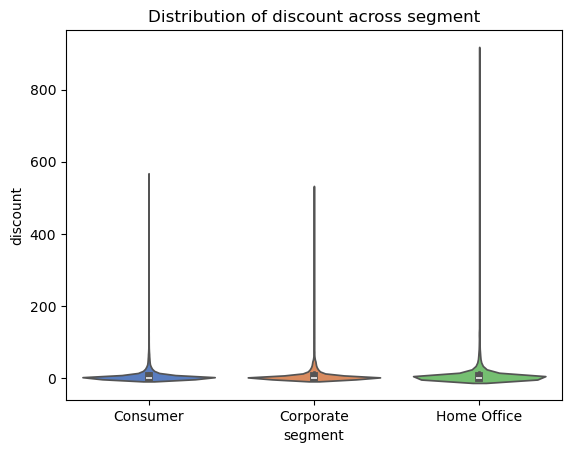

In [23]:
sns.violinplot(x='segment', y='discount', data=df, palette='muted')
plt.title("Distribution of discount across segment")
plt.show()

### HEATMAP

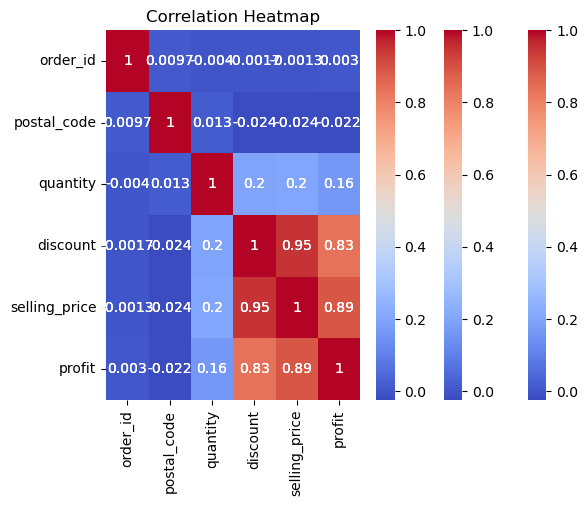

In [29]:
# Graphical representation of data where individual values are represented by color intensity
# sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

corr = df.corr(numeric_only=True)  # Compute correlation matrix for only numeric columns
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### PAIR PLOT

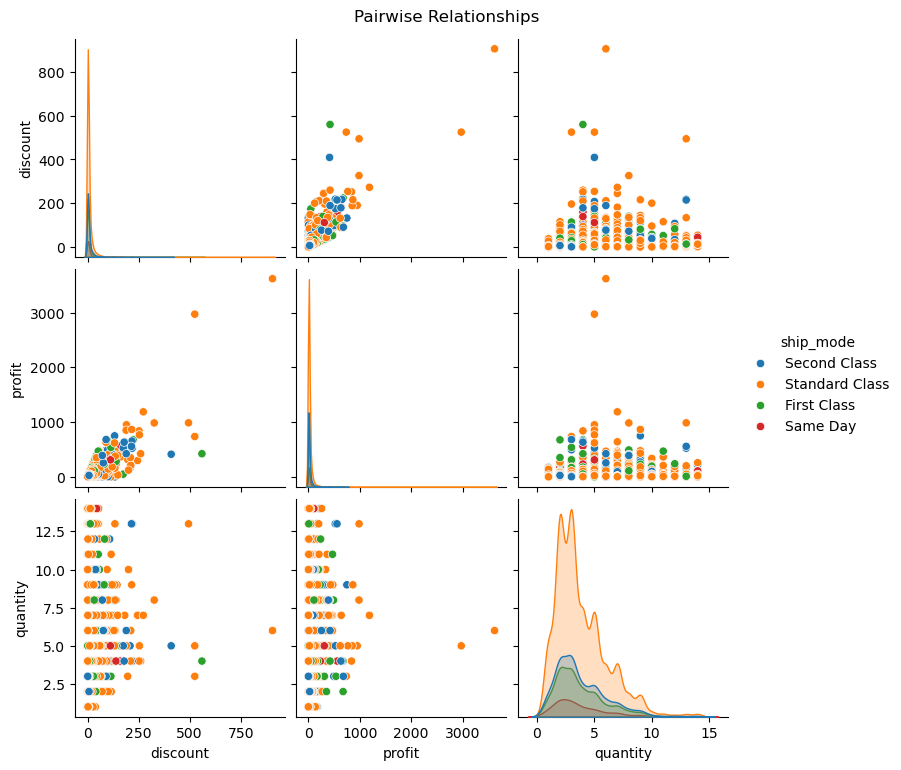

In [52]:
# A pair plot displays pairwise relationships in a dataset
# Combines both histogram and scatter plots therefore providing a unique overview of the dataset’s distributions and correlations
sns.pairplot(df[['discount', 'profit', 'quantity', 'ship_mode']], hue='ship_mode')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

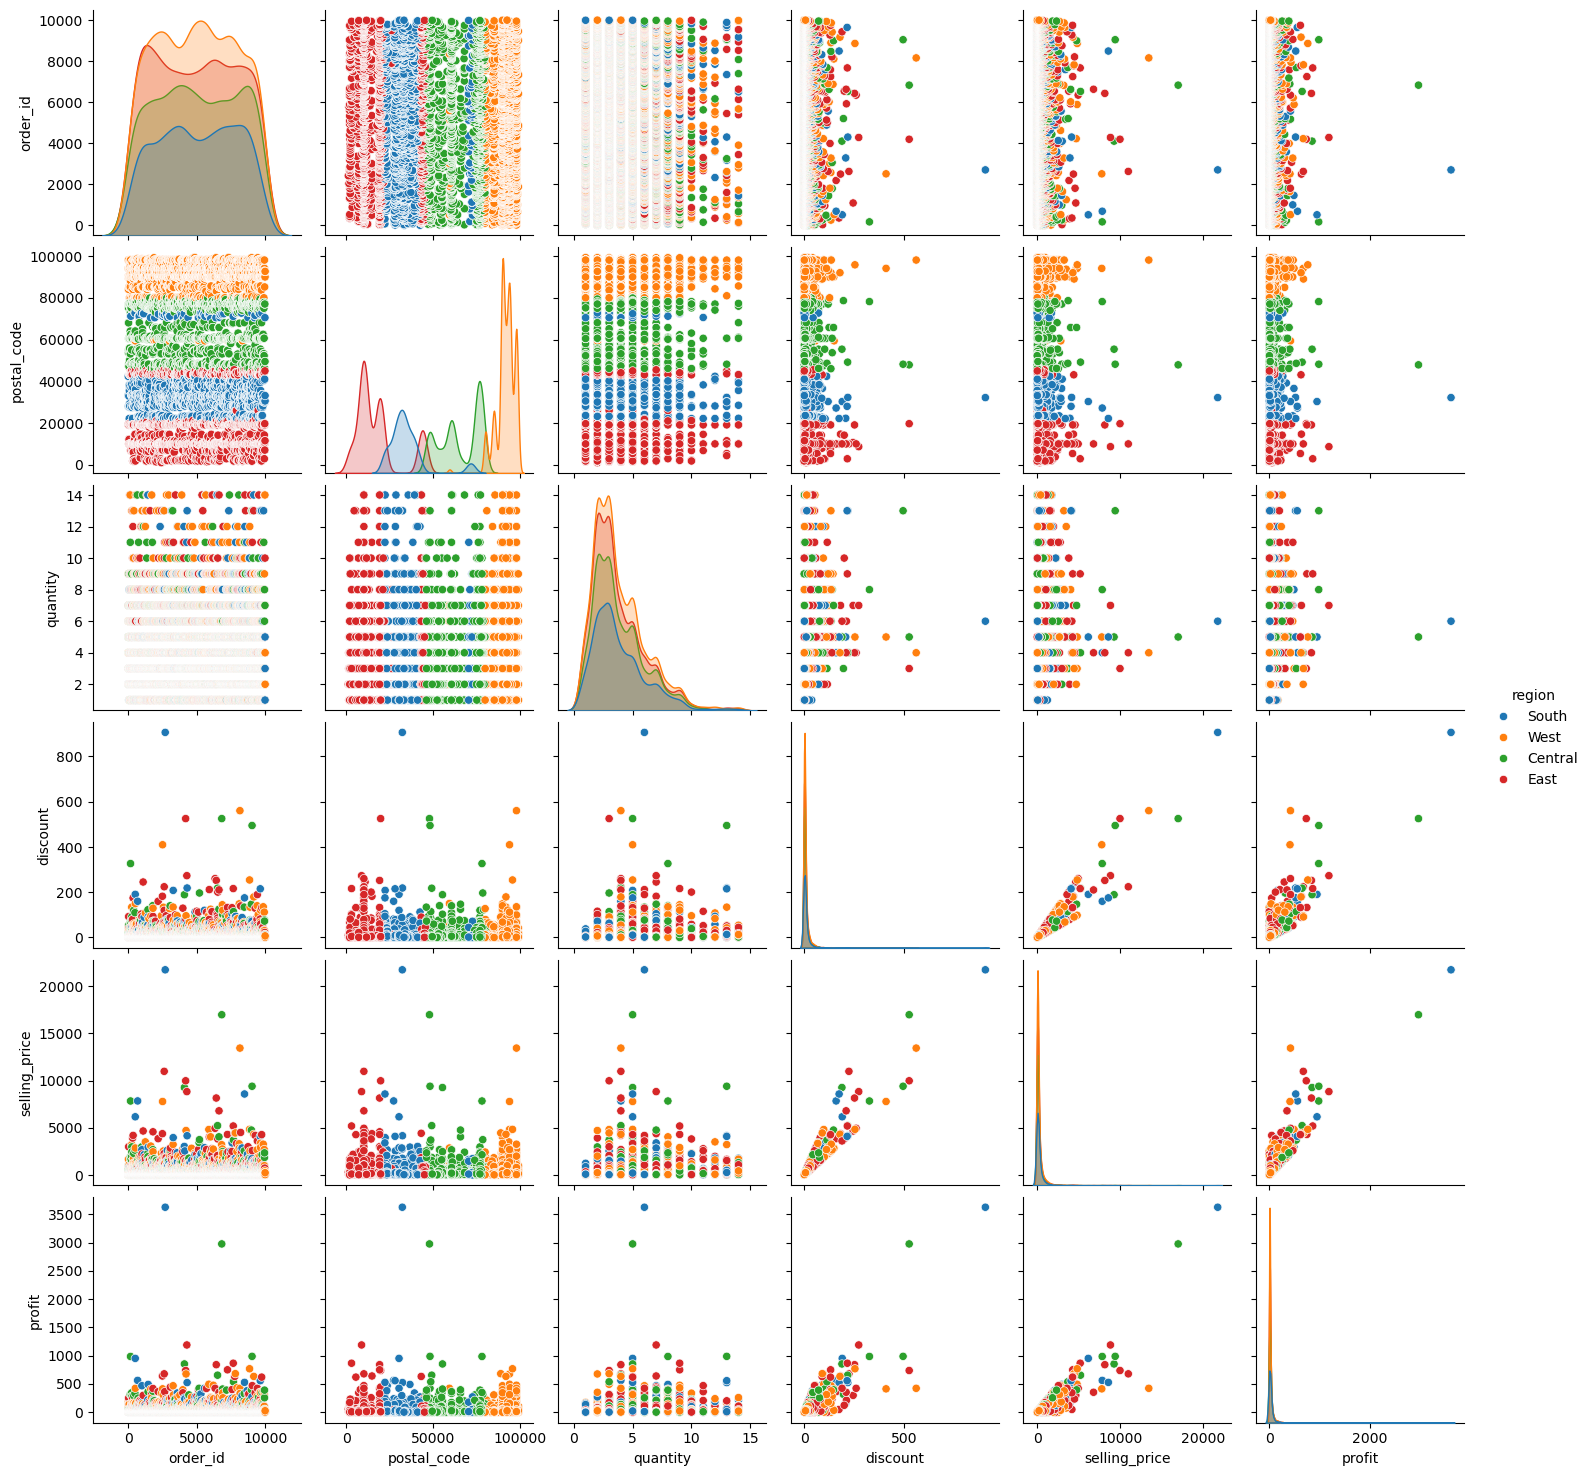

In [35]:
# A pair plot of the whole data frame 
sns.pairplot(df, hue='region')  
plt.show()

### HISTOGRAM

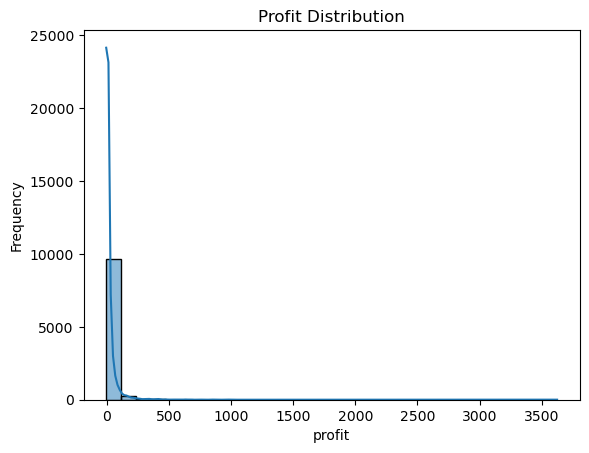

In [39]:
# A histogram shows the frequency distribution of a single variable
# Distribution of the profit using a histogram
plt.figure
sns.histplot(df['profit'], bins=30, kde=True)
plt.title('Profit Distribution')
plt.xlabel('profit')
plt.ylabel('Frequency')
plt.show()

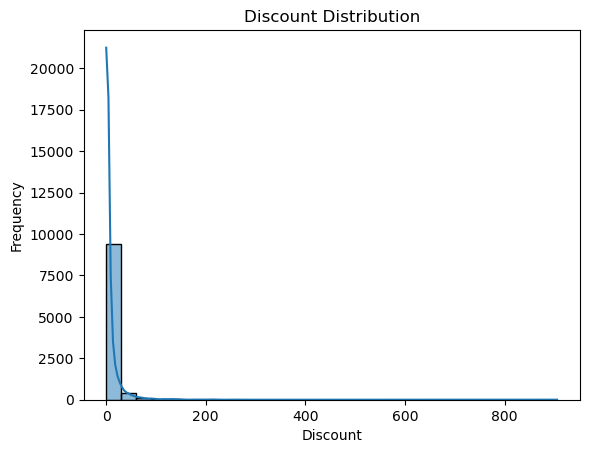

In [40]:
# Distribution of the discount
plt.figure
sns.histplot(df['discount'], bins=30, kde=True)
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

### STACKED AREA CHART

In [50]:
df.head(10)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,selling_price
profit,,,,,,,,,,,,,,,
14.8,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8
108.1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1
-0.5,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5
160.8,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8
-1.0,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0
-1.5,6,2022-03-13,NaN,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,7,1.5,48.5
-0.3,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,4,0.3,9.7
4.5,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,6,45.5,864.5
-0.4,9,2023-03-23,NaN,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,3,0.4,19.6


### STACKED AREA CHART

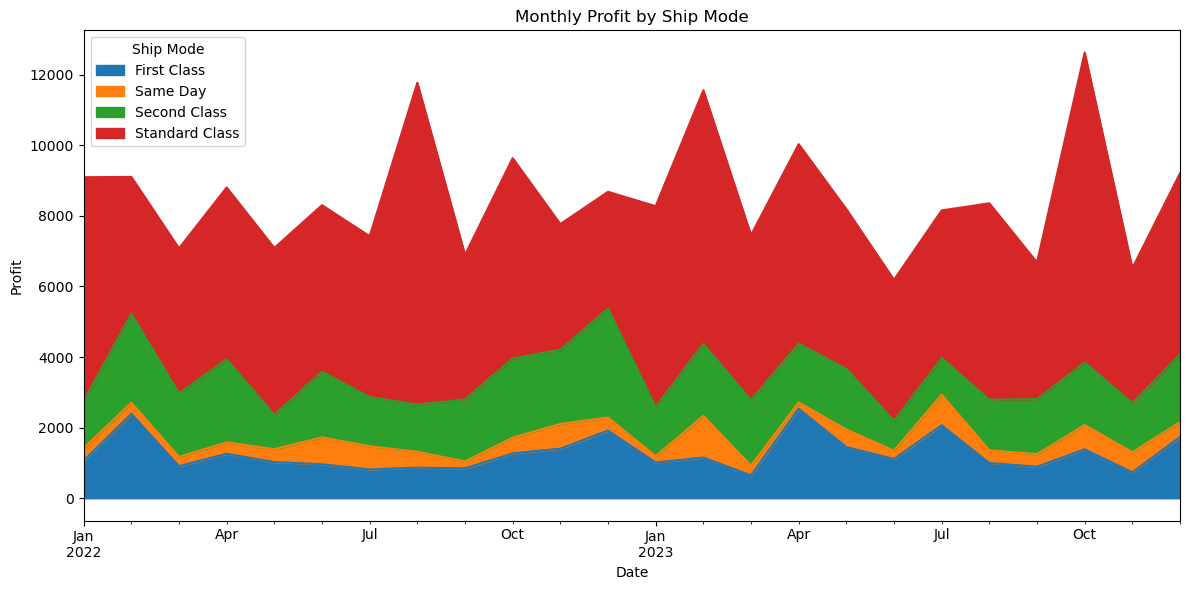

In [55]:
# It is a chart displays the evolution of multiple numeric variables over a continuous dimension, typically time.
# Make sure order_date is a datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Group by order date and category, then sum the profit
grouped = df.groupby([df['order_date'].dt.to_period('M'), 'ship_mode'])['profit'].sum().unstack().fillna(0)

# Convert PeriodIndex to datetime
grouped.index = grouped.index.to_timestamp()

# Plot stacked area chart
grouped.plot.area(stacked=True, figsize=(12, 6))
plt.title("Monthly Profit by Ship Mode")
plt.ylabel("Profit")
plt.xlabel("Date")
plt.legend(title="Ship Mode")
plt.tight_layout()
plt.show()


### PIE CHART

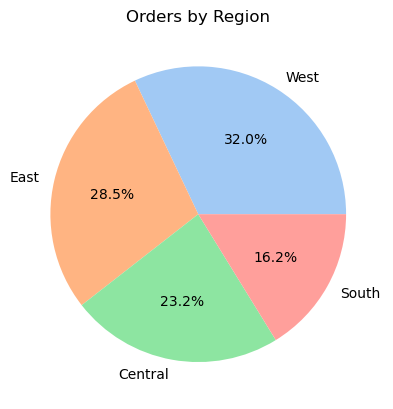

In [57]:
# Using a pie chart to visualize the profit by region
df['region'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Orders by Region")
plt.ylabel("")
plt.show()


### TREEMAP

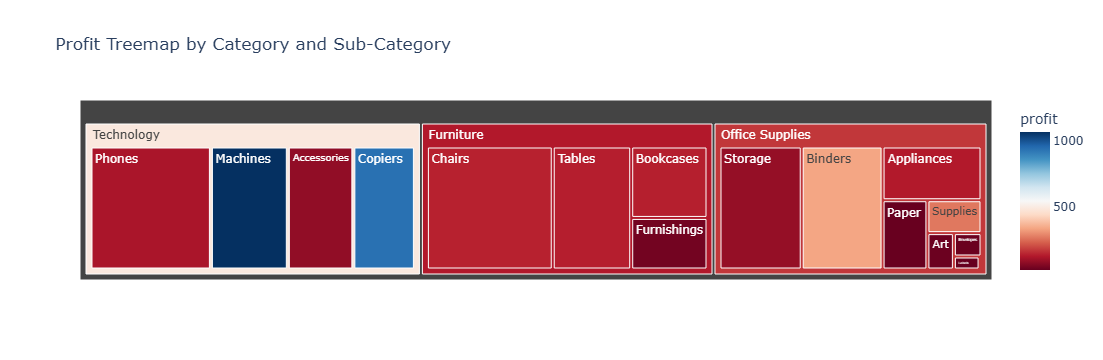

In [60]:
# Utilized in showing hierarchical relationships and sizes
fig = px.treemap(
    df, 
    path=['category', 'sub_category'], 
    values='profit',
    color='profit', 
    color_continuous_scale='RdBu',
    title='Profit Treemap by Category and Sub-Category'
)
fig.show()

### BUBBLE CHART

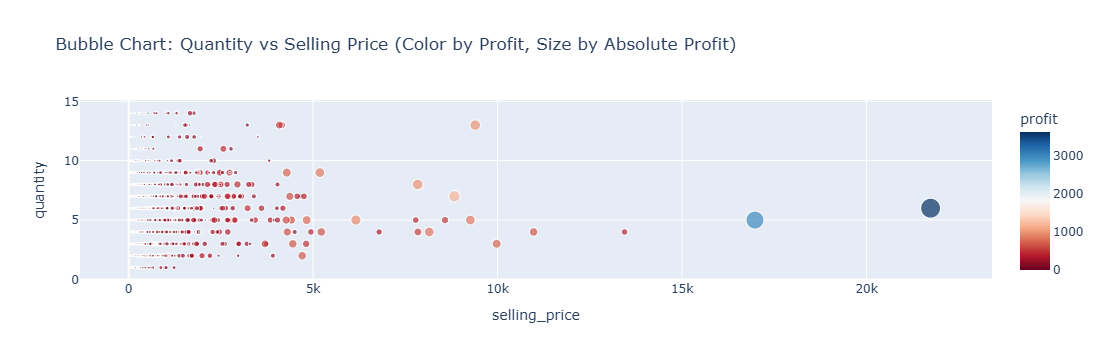

In [62]:
# Shows 3 variable relationships using size
fig = px.scatter(
    df,
    x='selling_price',
    y='quantity',
    size=df['profit'].abs(),
    color='profit',  # color shows positive vs negative
    hover_name='sub_category',
    title='Bubble Chart: Quantity vs Selling Price (Color by Profit, Size by Absolute Profit)',
    color_continuous_scale='RdBu'
)
fig.show()

### SUNBURST CHART

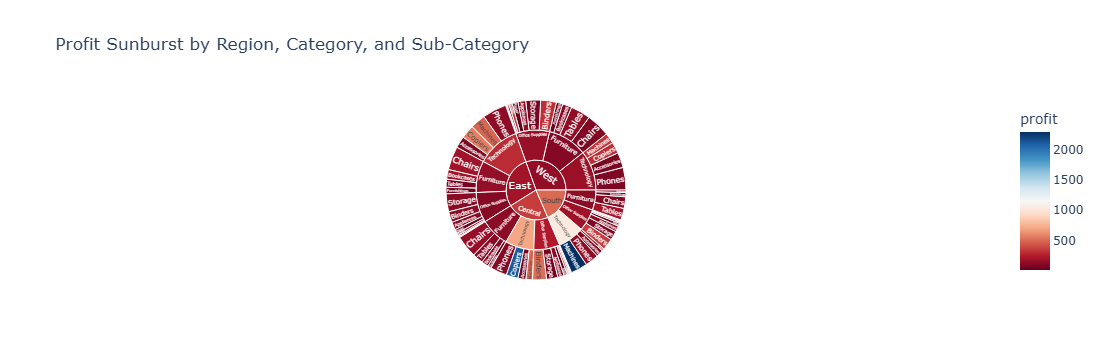

In [64]:
# This chart shows hierarchical category breakdowns
fig = px.sunburst(
    df,
    path=['region', 'category', 'sub_category'],
    values='profit',
    color='profit',
    color_continuous_scale='RdBu',
    title='Profit Sunburst by Region, Category, and Sub-Category'
)
fig.show()

### KDE PLOT

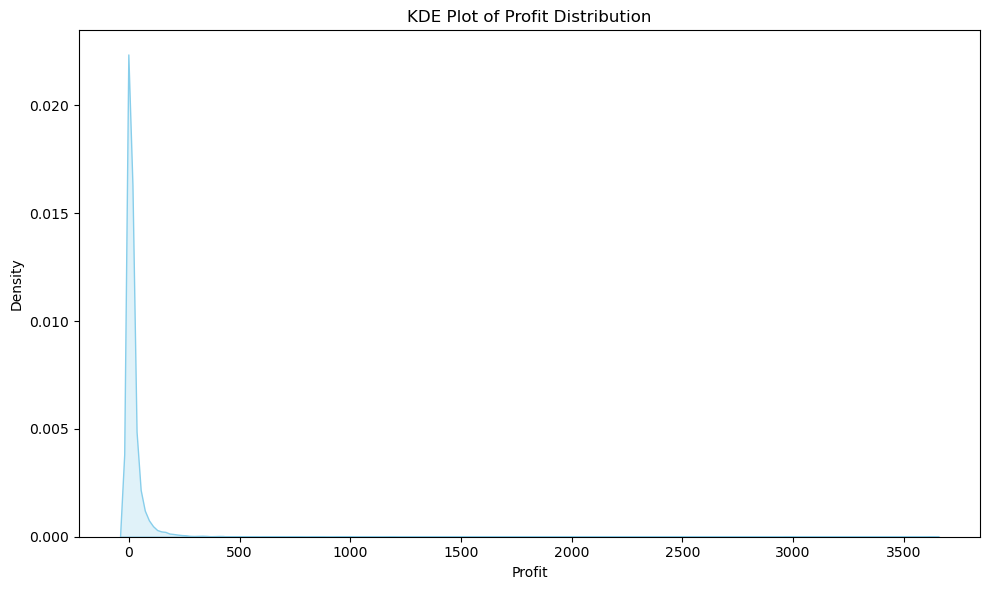

In [66]:
# KDE plot (Kernel Density Estimate plot) is a smooth curve that shows the distribution of a continuous variable
# It is like a smoothed version of a histogram.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='profit', fill=True, color='skyblue')
plt.title("KDE Plot of Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Density")
plt.tight_layout()
plt.show()